<IPython.core.display.Javascript object>


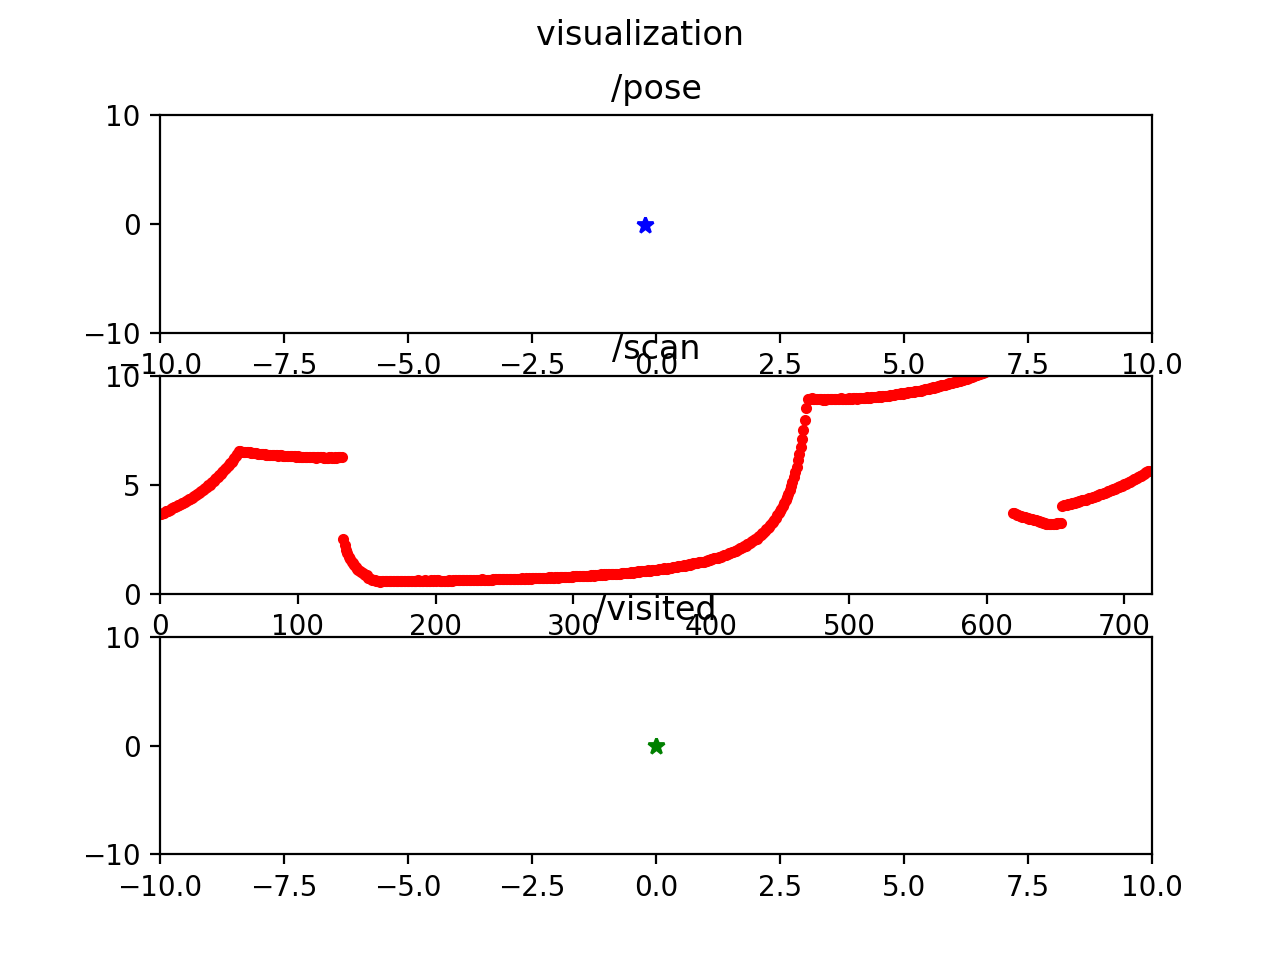

FloatSlider(value=0.0, description='X', max=10.0, min=-10.0)

FloatSlider(value=0.0, description='Y', max=10.0, min=-10.0)

Button(description='Move to target', style=ButtonStyle())

Avoid 1,1 those points that can't be reached
set goal0.00.0
heading to :0.0,0.0
arriving


In [11]:
# this is for moving to a target
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import rospy
import tf
from nav_msgs.msg import Odometry
from sensor_msgs.msg import LaserScan
from actionlib_msgs.msg import GoalID
from tf.transformations import quaternion_matrix
import numpy as np
from matplotlib.animation import FuncAnimation
import ipywidgets as widgets

from jupyros import ros3d
import os
import ipywidgets as widgets
from IPython.display import display
#!/usr/bin/env python3
import time
import rospy
from geometry_msgs.msg import Twist
from geometry_msgs.msg import Pose
from move_base_msgs.msg import MoveBaseActionGoal
from sensor_msgs.msg import LaserScan
pub_vel = rospy.Publisher("cmd_vel", Twist,queue_size=10) 
pub_goal = rospy.Publisher("/move_base/goal", MoveBaseActionGoal,queue_size=10)
cancel_goal = rospy.Publisher("/move_base/cancel", GoalID,queue_size=10)
CA_status = -1
state_description = ''
vel = Twist()
last_id = 'go'
#this module is for the controlling of moving around
import ipywidgets as widgets
from IPython.display import display
#!/usr/bin/env python3
import time
import rospy
from geometry_msgs.msg import Twist
from move_base_msgs.msg import MoveBaseActionGoal
from sensor_msgs.msg import LaserScan
pub_vel = rospy.Publisher("cmd_vel", Twist,queue_size=10) 
CA_status = -1
state_description = ''
vel = Twist()
x_1 = widgets.FloatSlider(description='X',value=0,min=-10,max=10)
y_1 = widgets.FloatSlider(description='Y',value=0,min=-10,max=10)

def clbk_laser(msg): #this is the laser data callback,and will be called any time when receiced scan data. the emergence brake is set inside this part
    regions = {
        'right':  min(min(msg.ranges[0:143]), 10),
        'fright': min(min(msg.ranges[144:287]), 10),
        'front':  min(min(msg.ranges[288:431]), 10),
        'fleft':  min(min(msg.ranges[432:575]), 10),
        'left':   min(min(msg.ranges[576:719]), 10),
    }
    take_action(regions)

def take_action(regions): #action of the laser data. In this part CA_status will be updated according to the current situation.
    global CA_status
    global state_description
    global vel
    if regions['front'] > 1 and regions['left'] > 1 and regions['right'] > 1:
        state_description = 'case 1 - OK'
        CA_status = 1
    elif regions['front'] < 1 and regions['left'] > 1 and regions['right'] > 1:
        state_description = 'case 2 - front_disable'
        CA_status = 2
    elif regions['front'] > 1 and regions['left'] > 1 and regions['right'] < 1:
        state_description = 'case 3 - right_disable'
        CA_status = 3
    elif regions['front'] > 1 and regions['left'] < 1 and regions['right'] > 1:
        state_description = 'case 4 - left_disable'
        CA_status =4
    elif regions['front'] < 1 and regions['left'] > 1 and regions['right'] < 1:
        state_description = 'case 5 - front_right_disable'
        CA_status = 5
    elif regions['front'] < 1 and regions['left'] < 1 and regions['right'] > 1:
        state_description = 'case 6 - front_left_disable'
        CA_status = 6
    elif regions['front'] < 1 and regions['left'] < 1 and regions['right'] < 1:
        state_description = 'case 7 - backward allowed'
        CA_status = 7
    elif regions['front'] > 1 and regions['left'] < 1 and regions['right'] < 1:
        state_description = 'case 8 - left_right_disable'
        CA_status = 8
    else:
        state_description = 'unknown case'
    if regions['front'] < 1 and vel.linear.x >0: #emergency brake
        vel.linear.x = 0
        pub_vel.publish(vel) 
def on_button_clicked_W_av(b):
        global CA_status
        global vel
        if CA_status==2 or CA_status==5 or CA_status==6 or CA_status==7: 
            vel.linear.x = 0
        else:
            vel.linear.x = 1
        pub_vel.publish(vel)  
        time.sleep(0.01)
def on_button_clicked_S_av(b):
            global CA_status
            global vel
            vel.linear.x = 0
            pub_vel.publish(vel)  
            time.sleep(0.01)
def on_button_clicked_X_av(b):
            global CA_status
            global vel
            vel.linear.x = -1
            pub_vel.publish(vel)  
            time.sleep(0.01)
def on_button_clicked_A_av(b):
            global CA_status
            global vel
            if (CA_status==4 or CA_status==6 or CA_status==7 or CA_status==8) and vel.linear.x != 0 :
                vel.angular.z = 0
            else:
                vel.angular.z = 10
                pub_vel.publish(vel)
                time.sleep(0.1)
                vel.angular.z = 0
            pub_vel.publish(vel)  
def on_button_clicked_D_av(b):
            global CA_status
            global vel
            if (CA_status==3 or CA_status==5 or CA_status==7 or CA_status==8) and vel.linear.x != 0 :
                vel.angular.z = 0
            else:
                vel.angular.z = -10
                pub_vel.publish(vel)
                time.sleep(0.1)
                vel.angular.z = 0
            pub_vel.publish(vel) 
def on_button_clicked_W(b):
        vel.linear.x =  1
        pub_vel.publish(vel)  
        time.sleep(0.01)

def on_button_clicked_S(b):
            vel.linear.x = 0
            pub_vel.publish(vel)  
            time.sleep(0.01)

def on_button_clicked_X(b):
            vel.linear.x = -1
            pub_vel.publish(vel)  
            time.sleep(0.01)

def on_button_clicked_A(b):
            vel.angular.z = 10
            pub_vel.publish(vel)
            time.sleep(0.1)
            vel.angular.z = 0
            pub_vel.publish(vel)  

def on_button_clicked_D(b):
            vel.angular.z = -10
            pub_vel.publish(vel)
            time.sleep(0.1)
            vel.angular.z = 0 
            pub_vel.publish(vel)  

        
def mov_goal(x_1,y_1):  #reach the desired goal inputed by user.
    pos = MoveBaseActionGoal()
    c_id = GoalID()
    global last_id
    print("heading to :"+str(x_1)+","+str(y_1))
    pos.goal.target_pose.pose.orientation.w = 1
    pos.goal.target_pose.header.frame_id = 'map'
    pos.goal.target_pose.pose.position.y = y_1
    pos.goal.target_pose.pose.position.x = x_1
    c_id.id = last_id
    last_id = last_id +'1'
    pos.goal_id.id = last_id
    cancel_goal.publish(c_id)
    pub_goal.publish(pos)
    
#handle changes, the observe method of the widget can be used to register a callback.
def on_button_clicked(b):
        global x_1
        global y_1
        global vis_pos 
        x_ = x_1.value
        y_ = y_1.value
        vis_pos.set_goal(x_,y_)
        mov_goal(x_,y_)  
         

def mod1_click(b):
    global x_1 
    global y_1 
    display(x_1,y_1)
    button = widgets.Button(description="Move to target")
    button.on_click(on_button_clicked)
    display(button)
    print('Avoid 1,1 those points that can\'t be reached')
    c_id = GoalID()
    global last_id
    c_id.id = last_id
    cancel_goal.publish(c_id)
    

def mod2_click(b):
    button_W = widgets.Button(description="W")
    button_A = widgets.Button(description="A")
    button_S = widgets.Button(description="S")
    button_D = widgets.Button(description="D")
    button_X = widgets.Button(description="X")
    button_W.on_click(on_button_clicked_W)
    button_S.on_click(on_button_clicked_S)
    button_X.on_click(on_button_clicked_X)
    button_A.on_click(on_button_clicked_A)
    button_D.on_click(on_button_clicked_D)
    display(button_W,widgets.HBox((button_A, button_S,button_D)),button_X)
    c_id = GoalID()
    global last_id
    c_id.id = last_id
    cancel_goal.publish(c_id)
    
def mod3_click(b):
    button_W_av = widgets.Button(description="W")
    button_A_av = widgets.Button(description="A")
    button_S_av = widgets.Button(description="S")
    button_D_av = widgets.Button(description="D")
    button_X_av = widgets.Button(description="X")
    button_W_av.on_click(on_button_clicked_W_av)
    button_S_av.on_click(on_button_clicked_S_av)
    button_X_av.on_click(on_button_clicked_X_av)
    button_A_av.on_click(on_button_clicked_A_av)
    button_D_av.on_click(on_button_clicked_D_av)
    display(button_W,widgets.HBox((button_A, button_S,button_D)),button_X)
    sub_scan = rospy.Subscriber('/scan', LaserScan, clbk_laser)
    c_id = GoalID()
    global last_id
    c_id.id = last_id
    cancel_goal.publish(c_id)
    
class Visualiser_position:
    def __init__(self):
        self.fig, (self.ax1,self.ax2,self.ax3) = plt.subplots(3,1)
        self.ln1, = self.ax1.plot([], [], 'b*')
        self.x1_data, self.y1_data = [] , []
        self.ln2, = self.ax2.plot([], [], 'r.')
        self.x2_data, self.y2_data = [] , []
        self.ln3, = self.ax3.plot([], [], 'g*')
        self.x3_data, self.y3_data = [] , []
        self.fig.suptitle('visualization')
        self.goal_x = -100
        self.goal_y = -100
        self.move_status = 0
    def plot_init_pos(self):
        self.ax1.set_xlim(-10, 10)
        self.ax1.set_ylim(-10, 10)
        self.ax1.set_title('/pose')
        return self.ln1
    def set_goal(self,x_,y_):
        self.goal_x = x_
        self.goal_y = y_
        self.move_status = 1
        print('set goal{}{}'.format(x_,y_))
    def odom_callback_pos(self, msg):
        #check if visited if reached just append the position
        if self.move_status == 1 and abs(self.goal_x - msg.pose.pose.position.x)<=0.55 \
                                 and abs(self.goal_y - msg.pose.pose.position.y)<=0.55 : 
            self.y3_data.append(self.goal_y)
            self.x3_data.append(self.goal_x)
            self.goal_y = -100
            self.goal_x = -100
            self.move_status = 0
            print('arriving')
        
        self.y1_data = msg.pose.pose.position.y
        self.x1_data = msg.pose.pose.position.x
        
    def update_plot_pos(self, frame):
        self.ln1.set_data(self.x1_data, self.y1_data)
        return self.ln1
    
    def plot_init_visited(self):
        self.ax3.set_xlim(-10, 10)
        self.ax3.set_ylim(-10, 10)
        self.ax3.set_title('/visited')
        return self.ln3

    def update_plot_visited(self, frame):
        self.ln3.set_data(self.x3_data, self.y3_data)
        return self.ln3
    
    def plot_init_scan(self):
        self.ax2.set_xlim(0, 720)
        self.ax2.set_ylim(0, 10)
        self.ax2.set_title('/scan')
        
        return self.ln2
    
    def scan_callback_scan(self, msg):
        self.y2_data = msg.ranges[0:719]
        self.x2_data = range(0,719)
        
    def update_plot_scan(self, frame):
        self.ln2.set_data(self.x2_data, self.y2_data)
        return self.ln2
    

rospy.init_node("UI1")
vis_pos = Visualiser_position()
vis_scan = vis_pos
sub_pos = rospy.Subscriber('/odom', Odometry, vis_pos.odom_callback_pos)
ani_pos = FuncAnimation(vis_pos.fig, vis_pos.update_plot_pos, init_func=vis_pos.plot_init_pos)
sub_scan = rospy.Subscriber('/scan', LaserScan, vis_scan.scan_callback_scan)
ani_scan = FuncAnimation(vis_scan.fig, vis_scan.update_plot_scan, init_func=vis_scan.plot_init_scan)
ani_visited = FuncAnimation(vis_scan.fig, vis_scan.update_plot_visited, init_func=vis_scan.plot_init_visited)
plt.show(block=True)    
     
sub_scan = None
button_mod1 = widgets.Button(description="MODE 1")
button_mod1.on_click(mod1_click)
button_mod2 = widgets.Button(description="MODE 2")
button_mod2.on_click(mod2_click)
button_mod3 = widgets.Button(description="MODE 3")
button_mod3.on_click(mod3_click)
display(widgets.HBox((button_mod1,button_mod2,button_mod3)))

